<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

# Адаптивные методы Рунге-Кутты

### Modules - Ordinary Differential Equations
<section class="post-meta">
By Jonas Tjemsland, Andreas Krogen, Håkon Ånes and Jon Andreas Støvneng
</section>
Last edited: February 7th 2018 
___

Этот модуль дает краткое введение в концепцию "методов с адаптивным размером шага" для решения обыкновенных дифференциальных уравнений (ОДУ). Мы собираемся решить ОДУ первого порядка формы

$$
\frac{\text{d}}{\text{d}t}y(t) = f(y(t), t).
$$

Удобно рассматривать параметр $t$ как "время", а $y$ как "положение" в момент времени $t$. Концепция адаптивного размера шага легко обобщается, например, на ОДУ более высокого порядка, во многом так же, как менее сложный явный метод Эйлера может быть обобщен на метод Рунге-Кутты (четвертого порядка).

### Основная идея адаптивных методов Рунге-Кутты

Адаптивный метод Рунге-Кутты - это метод, который использует два различных порядка аппроксимации (часто один с порядком $p$ и один с порядком $p+1$) для получения оценки локальной ошибки усечения. Таким образом, можно более или менее решить, какую точность мы хотим, чтобы размер шага менялся для каждой итерации. Еще одним преимуществом методов адаптивного размера шага является то, что мы можем иметь больше шагов там, где это необходимо, и меньше шагов в других местах (пример будет приведен ниже). Однако, как видно, эти методы часто требуют дополнительных вычислений.

Следуя этой идее, мы можем легко разработать пару методов Рунге-Кутты (RK) (один с порядком $p$ и один с порядком $p+1$), которые разделяют некоторые необходимые вычисления. Это позволяет нам оценить локальную ошибку усечения почти без дополнительных вычислений. Такие пары называются $\textbf{встроенные пары Рунге-Кутта}$.

Во-первых, мы импортируем необходимые библиотеки и устанавливаем некоторые общие параметры рисунка.

In [9]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

# Set common figure parameters
newparams = {'figure.figsize': (10, 4), 'axes.grid': True,
             'lines.linewidth': 1.5, 'lines.markersize': 10,
             'font.size': 14}
plt.rcParams.update(newparams)

### Реализация функций

Пришло время определить некоторые функции, которые будут вычислять два разных порядка аппроксимации для правой части (RHS) ОДУ, а именно $f(y(t), t)$. Следующие функции являются некоторыми примерами адаптивных методов Рунге-Кутты. Алгоритм получения этих методов приведен в [2].

In [4]:
def odesolver12(f, t, y, h):
    
    """Вычислит следующий шаг задачи начального значения (IVP)
    ОДУ с RHS, описываемой f, в первом порядке точности
    (Метод Эйлера) и втором (Правило Средней точки). Это
    самая простая встроенная пара RK.
    Параметры:
        f: функция. RHS из ОДУ.
        t: float. Текущее время.
        y: float. Текущая позиция.
        h: float. Длина шага.
    Возвращается:
        q: float. первый порядок точности
        w: float. второй порядок точности
    """
    s1 = f(t, y)
    s2 = f(t+h, y+h*s1)
    w = y + h*s1
    q = y + h/2.0*(s1+s2)
    return w, q

def odesolver23(f, t, y, h):
    """Вычислит следующий шаг IVP ОДУ с RHS, 
    описанной f, с порядком прибл. 2 (Явный метод трапеций) 
    и порядка 3 (РК третьего порядка).
    Параметры:
        f: функция. RHS из ОДУ.
        t: float. Текущее время.
        y: float. Текущая позиция.
        h: float. Длина шага.
    Возвращается:
        q: float. второй порядок точности
        w: float. третий порядок точности
    """
    s1 = f(t, y)
    s2 = f(t+h, y+h*s1)
    s3 = f(t+h/2.0, y+h*(s1+s2)/4.0)
    w = y + h*(s1+s2)/2.0
    q = y + h*(s1+4.0*s3+s2)/6.0
    return w, q

def odesolver45(f, t, y, h):
    """Вычислит следующий шаг IVP ОДУ с RHS, описанным f, 
    с порядком точности 4 и 5.
    Параметры:
        f: функция. RHS из ОДУ.
        t: float. Текущее время.
        y: float. Текущая позиция.
        h: float. Длина шага.
    Возвращается:
        q: float. второй порядок точности
        w: float. третий порядок точности
    """
    s1 = f(t, y)
    s2 = f(t+h/4.0, y+h*s1/4.0)
    s3 = f(t+3.0*h/8.0, y+3.0*h*s1/32.0+9.0*h*s2/32.0)
    s4 = f(t+12.0*h/13.0, y+1932.0*h*s1/2197.0-7200.0*h*s2/2197.0+7296.0*h*s3/2197.0)
    s5 = f(t+h, y+439.0*h*s1/216.0-8.0*h*s2+3680.0*h*s3/513.0-845.0*h*s4/4104.0)
    s6 = f(t+h/2.0, y-8.0*h*s1/27.0+2*h*s2-3544.0*h*s3/2565+1859.0*h*s4/4104.0-11.0*h*s5/40.0)
    w = y + h*(25.0*s1/216.0+1408.0*s3/2565.0+2197.0*s4/4104.0-s5/5.0)
    q = y + h*(16.0*s1/135.0+6656.0*s3/12825.0+28561.0*s4/56430.0-9.0*s5/50.0+2.0*s6/55.0)
    return w, q

### Выбираем адаптивный размер шага

В приведенных выше определениях функций $w$ представляет приближение самого низкого порядка, а $q$ - приближение более высокого порядка. Когда $h$ мал, хорошая оценка ошибки для $w$ 

$$
e_{i+1}\approx \left|q_{i+1}-w_ {i+1}\right|.
$$

Идея заключается в том, что можно выполнить один шаг вычисления, а затем проверить оценку ошибки $e_i$ или относительную ошибку $e_i/\left|w_i\right|$. Если ошибка превышает выбранную точность, $TOL$, размер шага уменьшается на заданную величину, часто выбирается удваивание шага или сокращение его в два раза. 

Мы всегда хотим минимизировать использование вычислительных ресурсов, но в то же время оставаться в пределах заданной точности. Поэтому было бы неплохо изменить размер шага для следующего шага, только если, например, ошибка текущего шага меньше $TOL/20$. Однако существуют более сложные способы изменения размера шага. 

Если мы допустим, что точность задается относительной ошибкой, $TOL > e_i/\left|w_i\right|$, и предположим, что $w$ имеет порядок $p$, ошибка задается $e_i = \mathcal{O}(h^{p+1})$. Предполагая, что

$$
e_i\approx \xi h_i^{p+1},
$$

для константы $\xi$ размер шага, наиболее близкий к требуемой точности, задается

$$
TOL\cdot \left|w_i\right| = \xi h^{p+1}.
$$

Это дает

$$
\tilde h = \left(\frac{TOL\cdot |w_i|}{e_i}\right)^{1/{p+1}}h_i,
$$

где $\tilde h$ - идеальное значение для размера следующего шага. Однако часто добавляется фактор безопасности, так что размер следующего шага становится, например, $h_{i+1}=0.8 \cdot\tilde h$. Более того, мы часто используем $e_i/\max(w_i, \theta)$ $(\theta>0)$ вместо относительной ошибки для защиты от небольших $w_i$.

Этот алгоритм для изменения размера шага выведен для $w_i$, приближения самого низкого порядка. Однако, поскольку аппроксимация более высокого порядка $q_i$ доступна (без дополнительных вычислений), это часто используется для оценки следующего шага.

Самый простой способ визуализировать метод адаптивного размера шага - это примеры.

### Пример 1
Сначала мы задаем правую часть ОДУ,

$$
f(y(t),t) = t - 2ty,
$$

которая имеет аналитическое решение $\frac{1}{2}(1-e^{-t^2})$. Давайте определим функции и приступим к решению ОДУ с использованием простейшего встроенного метода РК с приближениями 1 и 2 порядка. Мы обобщаем реализацию адаптивного метода РК, чтобы не повторяться.

In [5]:
def RHS1(t, y):
    return t - 2*t*y

def analytical(t, y):
    return 0.5*(1-np.exp(-t**2))

def rk_adaptive(ode, rhs, y0=0.0, t0=0.0, TOL=1e-04, theta=1e-02, tmax=1.0):
    """Perform an adaptive RK method.
    Parameters:
        ode:   функция. ODE solver.
        rhs:   функция. правая часть ОДУ.
        y0:    float, optional. Исходное положение.
        t0:    float, optional. Начальное время.
        TOL:   float, optional. Допустимая погрешность.
        theta: float, optional. "Защитная" константа.
        tmax:  float, optional. Конец расчетного интервала.
    Возвращается:
        y:     list. Позиция.
        t:     list. Время.
        i:     int. Количество итераций
    """
    
    # Выделит списки для хранения позиции и времени и установит
    # начальные условия.
    y = []
    t = []
    y.append(y0)
    t.append(t0)
    
    # Установит начальный размер шага и объявит целое число итерации
    h = 1.0
    i = 0
    
    while (t[i] < tmax):
        # Получим два разных приближения
        w, q = ode(rhs, t[i], y[i], h)
        # Ошибка оценки
        e = abs((w-q)/max(w, theta))
        # Если e больше, чем TOL, уменьшить длину шага
        if (e > TOL):
            h = 0.8*(TOL*e)**(1/5)*h
            # Получить два новых приближения
            w, q = ode(rhs, t[i], y[i], h)
            # Оценка новой ошибки
            e = abs((w-q)/max(w, theta))
            # Если e все еще больше, чем TOL, уменьшить длину шага вдвое
            while (e > TOL):
                h = h/2.0
                # Новые приближения
                w, q = ode(rhs, t[i], y[i], h)
                # Новая оценка ошибок
                e = abs((w-q)/max(w, theta))
        # Сохранить аппроксимацию высшего порядка в качестве следующего значения y
        y.append(q)
        # Сохранить текущее время + размер шага в следующий раз
        t.append(t[i] + h)
        # Номер шага инкрементируется
        i += 1
        # Проверим, не слишком ли мала e, если да, то удвоить размер шага
        if (e < 0.1*TOL):
            h = h*2.0
    
    return y, t, i

In [6]:
# Вычислить положение в зависимости от времени с помощью адаптивного
# Рунге-Кутта odesolver12, определенного выше
pos, times, iterations = rk_adaptive(odesolver12, RHS1, y0=0.0, t0=0.0, TOL=1e-02, theta=1e-03, tmax=1.0)

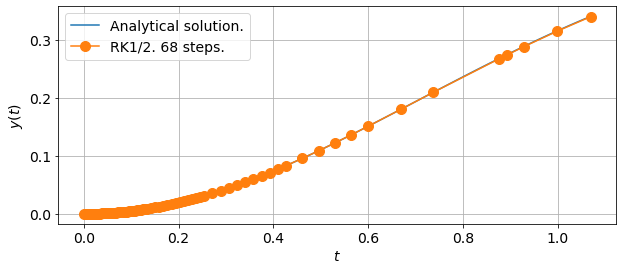

In [10]:
plt.figure()

# Аналитическое решение
ta = np.linspace(0, times[iterations])
ya = analytical(ta, 0)
plt.plot(ta, ya , label='Analytical solution.')

# RK1/2 plot
plt.plot(times, pos, '-o' , label='RK1/2. %i steps.' % (iterations+1))
plt.ylabel(r'$y(t)$')
plt.xlabel(r'$t$')
plt.legend(loc="best");

Мы наблюдаем, что метод RK хорошо использует 68 шагов, следующих за кривой, используя увеличивающийся размер шага $h$ по мере увеличения $t$.
### Example 2
Теперь мы хотим решить 

$$
y'(t)=\cos(y(t)\cdot t^2),\quad y(1)=3,
$$

опробовав все три встроенные функции, определенные выше.

In [11]:
def RHS2(t, y):
    return np.cos(y*t**2)

In [12]:
start12 = time.time()
pos12, time12, iterations12 = rk_adaptive(odesolver12, RHS2, y0=3.0, t0=1.0, tmax=3.0)
print("RK1/2 run time: %.5f s. Iterations: %i." % (time.time() - start12, iterations12 + 1))

start23 = time.time()
pos23, time23, iterations23 = rk_adaptive(odesolver23, RHS2, y0=3.0, t0=1.0, tmax=3.0)
print("RK2/3 run time: %.5f s. Iterations: %i." % (time.time() - start23, iterations23 + 1))

start45 = time.time()
pos45, time45, iterations45 = rk_adaptive(odesolver45, RHS2, y0=3.0, t0=1.0, tmax=3.0)
print("RK4/5 run time: %.5f s. Iterations: %i." % (time.time() - start45, iterations45 + 1))

RK1/2 run time: 0.01000 s. Iterations: 453.
RK2/3 run time: 0.00400 s. Iterations: 110.
RK4/5 run time: 0.00200 s. Iterations: 20.


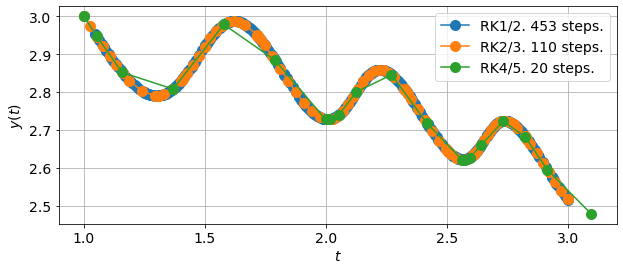

In [13]:
plt.figure()
plt.plot(time12, pos12, '-o', label='RK1/2. %i steps.' % (iterations12+1))
plt.plot(time23, pos23, '-o', label='RK2/3. %i steps.' % (iterations23+1))
plt.plot(time45, pos45, '-o', label='RK4/5. %i steps.' % (iterations45+1))
plt.ylabel(r'$y(t)$')
plt.xlabel(r'$t$')
plt.legend(loc="best");

Мы наблюдаем, что метод RK4/5 аппроксимирует значения функций одинаково, а метод RK1/2 делает на 433 шага меньше и затрачивает примерно 1/5 времени.

### Ссылки и дальнейшее чтение

[1] Sauer, T.: *Numerical Analysis international edition*, 2nd, Pearson 2014

[2] *Runge-Kutta methods*, Wikipedia, https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods (Acquired: 10.03.16)